In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [14]:
df = pd.read_csv("heart.csv")

In [15]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
age         303 non-null int64
sex         303 non-null int64
cp          303 non-null int64
trestbps    303 non-null int64
chol        303 non-null int64
fbs         303 non-null int64
restecg     303 non-null int64
thalach     303 non-null int64
exang       303 non-null int64
oldpeak     303 non-null float64
slope       303 non-null int64
ca          303 non-null int64
thal        303 non-null int64
target      303 non-null int64
dtypes: float64(1), int64(13)
memory usage: 33.2 KB


In [17]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [18]:
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

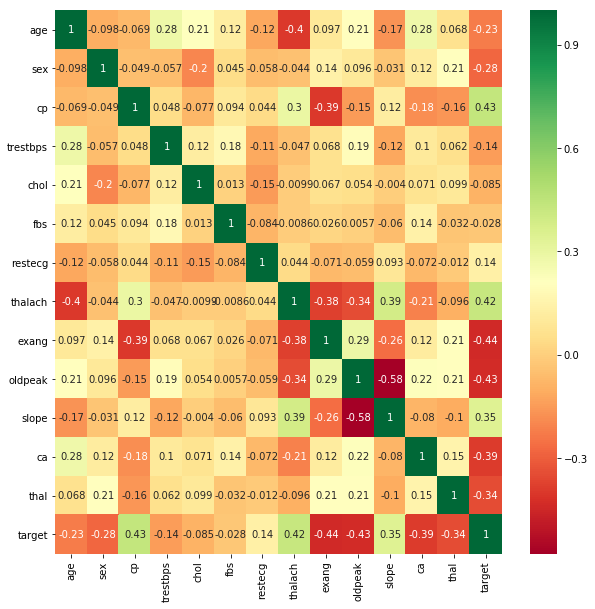

In [19]:
corr = df.corr()
top_cor = corr.index
plt.figure(figsize=(10,10))
sns.heatmap(df[top_cor].corr(), annot=True, cmap='RdYlGn')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000017D12184320>,
      dtype=object)

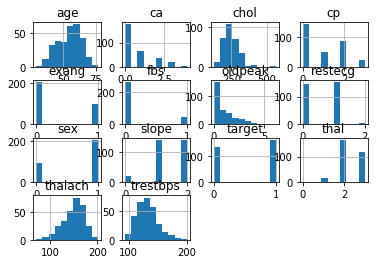

In [20]:
df.hist()

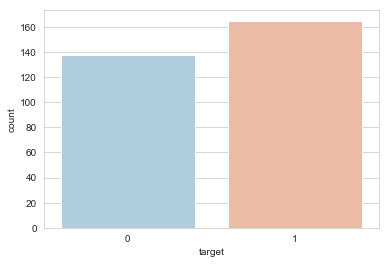

In [21]:
sns.set_style("whitegrid")
sns.countplot(x='target', data = df, palette='RdBu_r')

In [22]:
df = pd.get_dummies(df, columns=['cp', 'slope', 'ca', 'thal'])

In [23]:
df.head()

,age,sex,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,target,...,slope_2,ca_0,ca_1,ca_2,ca_3,ca_4,thal_0,thal_1,thal_2,thal_3
0,63,1,145,233,1,0,150,0,2.3,1,...,0,1,0,0,0,0,0,1,0,0
1,37,1,130,250,0,1,187,0,3.5,1,...,0,1,0,0,0,0,0,0,1,0
2,41,0,130,204,0,0,172,0,1.4,1,...,1,1,0,0,0,0,0,0,1,0
3,56,1,120,236,0,1,178,0,0.8,1,...,1,1,0,0,0,0,0,0,1,0
4,57,0,120,354,0,1,163,1,0.6,1,...,1,1,0,0,0,0,0,0,1,0


In [26]:
df.columns

Index(['age', 'sex', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang',
       'oldpeak', 'target', 'cp_0', 'cp_1', 'cp_2', 'cp_3', 'slope_0',
       'slope_1', 'slope_2', 'ca_0', 'ca_1', 'ca_2', 'ca_3', 'ca_4', 'thal_0',
       'thal_1', 'thal_2', 'thal_3'],
      dtype='object')

In [28]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scale_col = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
df[scale_col] = scaler.fit_transform(df[scale_col])

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [29]:
df.head()

,age,sex,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,target,...,slope_2,ca_0,ca_1,ca_2,ca_3,ca_4,thal_0,thal_1,thal_2,thal_3
0,0.952197,1,0.763956,-0.256334,1,0,0.015443,0,1.087338,1,...,0,1,0,0,0,0,0,1,0,0
1,-1.915313,1,-0.092738,0.072199,0,1,1.633471,0,2.122573,1,...,0,1,0,0,0,0,0,0,1,0
2,-1.474158,0,-0.092738,-0.816773,0,0,0.977514,0,0.310912,1,...,1,1,0,0,0,0,0,0,1,0
3,0.180175,1,-0.663867,-0.198357,0,1,1.239897,0,-0.206705,1,...,1,1,0,0,0,0,0,0,1,0
4,0.290464,0,-0.663867,2.082050,0,1,0.583939,1,-0.379244,1,...,1,1,0,0,0,0,0,0,1,0


In [30]:
y = df['target']
X = df.drop(['target'], axis=1)

In [44]:
from sklearn.model_selection import cross_val_score
knn_score = []
for i in range(1, 50):
    knn_classifier = KNeighborsClassifier(n_neighbors=i)
    score = cross_val_score(knn_classifier, X, y, cv=10)
    knn_score.append(score.mean())

In [62]:
print(knn_score,'\n')
# sort_knn = knn_score
# sort_knn.sort(reverse=True)
# print("sorted {}".format(sort_knn))
# print(knn_score)
print("max score: {}, at index: {}".format(max(knn_score), knn_score.index(max(knn_score))))

[0.7484909158324065, 0.7683833889506859, 0.7942973674453097, 0.8014015572858731, 0.8274230626622172, 0.8240823136818687, 0.8305413422321097, 0.8242973674453097, 0.8502261772339639, 0.8504338153503893, 0.8405487578791251, 0.8474378939562477, 0.8369929551353354, 0.8404338153503893, 0.8268705969595848, 0.833874675565443, 0.8303188728216536, 0.8337671486837227, 0.8269855394883205, 0.8237597330367074, 0.8273229514275121, 0.8306562847608454, 0.8338820912124584, 0.827100482017056, 0.8235372636262515, 0.8233147942157952, 0.8267630700778643, 0.8199740452354469, 0.8203114571746385, 0.8137523173896921, 0.8170930663700406, 0.8205413422321097, 0.8237671486837226, 0.8267704857248794, 0.8302187615869483, 0.8302187615869483, 0.8169855394883203, 0.8169855394883203, 0.826662958843159, 0.8234371523915461, 0.8202113459399332, 0.8169855394883203, 0.8201038190582128, 0.8168780126065999, 0.8234371523915461, 0.8135446792732666, 0.8267704857248794, 0.8199888765294773, 0.8202113459399332] 

max score: 0.8504338

Text(0.5, 1.0, 'K neighbours plot')

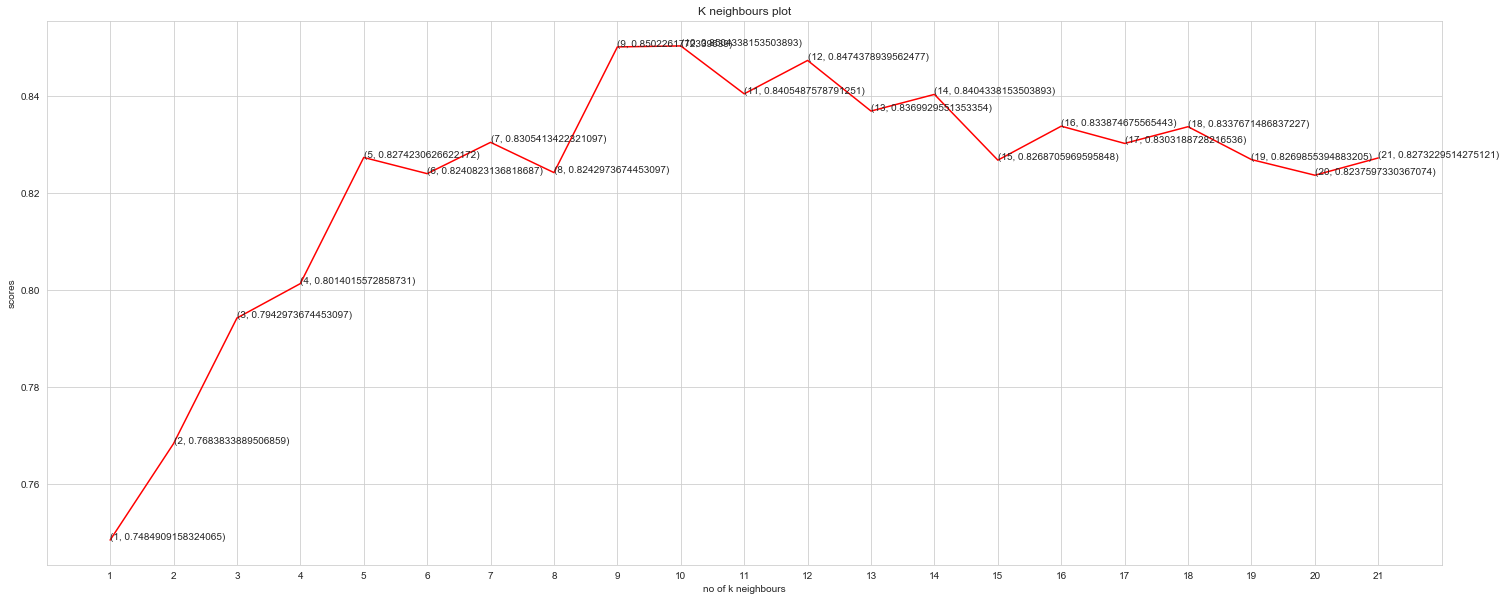

In [58]:
plt.figure(figsize=(25,10))
plt.plot([k for k in range(1,22)], knn_score[:21], color='red')
for i in range(1, 22):
    plt.text(i, knn_score[i-1], (i, knn_score[i-1]))
plt.xticks([i for i in range(1,22)])
plt.xlabel("no of k neighbours")
plt.ylabel("scores")
plt.title("K neighbours plot")

# #KNN model with KNNeighbour=10

In [ ]:
knn_classifier1 = KNeighborsClassifier(n_neighbors=10)
knn_score = cross_val_score(knn_classifier1, X, y, cv=10)
knn_score.mean()